https://github.com/Arun-purakkatt/Deep_Learning_Pytorch


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.layers import PReLU
%matplotlib inline

In [5]:
# Explore CIFAR Data set
#dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
#test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# size of training data
#dataset_size = len(dataset)
dataset_size = len(x_train)
print(dataset_size)

# size of test data
#test_dataset_size = len(test_dataset)
test_dataset_size = len(x_test)
print(test_dataset_size)

# number of classes in the data set
#classes = dataset.classes
#print(classes)
classes =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classes)

num_classes = len(classes)
print(num_classes)

170498071/170498071 [==============================] - 14s 0us/step
50000
10000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10


In [ ]:
# Let us understand the size of one image
#img, label = dataset[0]
img = x_train[0]
img_shape = img.shape
img_shape

(32, 32, 3)

Label (numeric): [1]
Label (textual): automobile


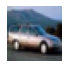

In [6]:
# Let us look at a sample image
img = x_train[4]
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.axis('off')
print('Label (numeric):', y_train[4])
print('Label (textual):', classes[int(y_train[4])])

In [7]:
# Number of images belonging to each data set
class_count = {}
for sample in y_train:
    label = classes[int(sample)]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

In [8]:
# Prepare data for training
tf.random.set_seed(43)
val_size = 5000
train_size = len(x_train) - val_size

In [16]:
#train_ds, val_ds = tf.keras.utils.split_dataset(x_train, [train_size, val_size])
#len(train_ds), len(val_ds)
train_dg = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True, vertical_flip=False, validation_split=val_size/len(x_train))
val_dg = ImageDataGenerator(rescale=1./255)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
train_ds = train_dg.flow(x_train, y_train_cat, batch_size=128)
val_ds = val_dg.flow(x_test, y_test_cat, batch_size=128)
print(train_ds[0][0].shape)
print(val_ds[0][0].shape)

(128, 32, 32, 3)
(128, 32, 32, 3)


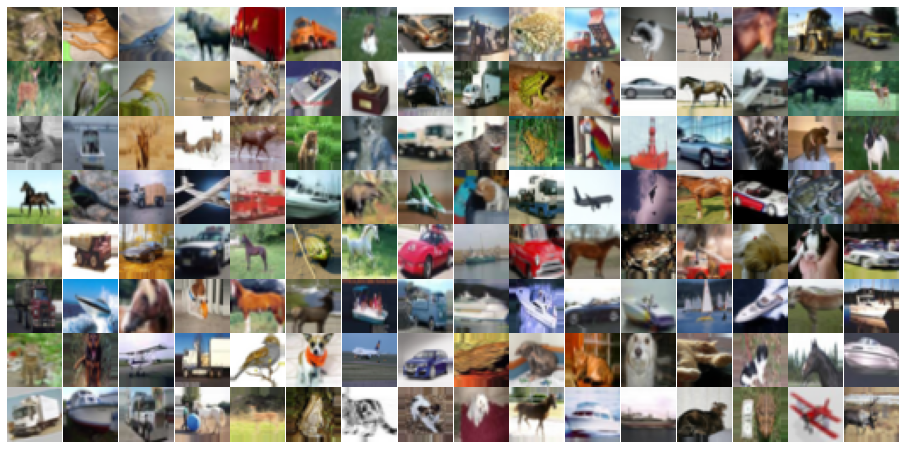

In [43]:
#visualize a batch of data using the make_grid helper function from Torchvision
_, img_plt = plt.subplots(8,16, figsize=(16, 8))
for i in range(8):
  for j in range(16):
    img_plt[i,j].imshow(train_ds[0][0][i + j * 8])
    img_plt[i,j].axis("off")
plt.subplots_adjust(wspace=0, hspace=0)

# Multilayer Perceptron (MLP)

In [46]:
# Base Model class & Training on GPU
model_temp_1 = Sequential()

# Input Layer
model_temp_1.add(layers.Input(shape=val_ds[0][0][0].shape))
model_temp_1.add(layers.Flatten())

# Hidden Layer
model_temp_1.add(layers.Dense(256))
model_temp_1.add(PReLU())
model_temp_1.add(layers.Dense(128))
model_temp_1.add(PReLU())
model_temp_1.add(layers.Dense(64))
model_temp_1.add(PReLU())

# Output Layer
model_temp_1.add(layers.Dense(num_classes))
model_temp_1.add(layers.Activation('softmax'))

# Summary model
model_temp_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 p_re_lu (PReLU)             (None, 256)               256       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 p_re_lu_1 (PReLU)           (None, 128)               128       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 p_re_lu_2 (PReLU)           (None, 64)                6

In [47]:
class ImageClassificationBase(keras.callbacks.Callback):
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_accuracy: {:.4f}".format(epoch, result['loss'], result['accuracy']))

In [ ]:
history = {"loss" : [] , "accuracy" : []}
res = [ImageClassificationBase()]
train_var = [(2, 1e-2), (2, 1e-3), (2, 1e-4), (2, 1e-5), (2, 5e-6)]

for epoch, n in train_var:
    # Training Phase 
    print(f"training for {epoch} epochs and learning rate {n}")
    model_temp_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=n), metrics=['accuracy'])
    model_temp_1_fit = model_temp_1.fit(x=train_ds, epochs=epoch, validation_data=train_ds)
    history["loss"] += model_temp_1_fit.history["val_loss"]
    history["accuracy"] += model_temp_1_fit.history["val_accuracy"] 

training for 2 epochs and learning rate 0.01
Epoch 1/2
391/391 [==============================] - 69s 176ms/step - loss: 1.7645 - accuracy: 0.3707 - val_loss: 1.7568 - val_accuracy: 0.3670
Epoch 2/2
391/391 [==============================] - 61s 157ms/step - loss: 1.7209 - accuracy: 0.3784 - val_loss: 1.6778 - val_accuracy: 0.3934
training for 2 epochs and learning rate 0.001
Epoch 1/2
391/391 [==============================] - 61s 156ms/step - loss: 1.5909 - accuracy: 0.4275 - val_loss: 1.6057 - val_accuracy: 0.4220
Epoch 2/2
 17/391 [>.............................] - ETA: 26s - loss: 1.6056 - accuracy: 0.4338

In [50]:
# function to plot losses
def plot_losses(history):
    losses = [x['loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [51]:
# function to plot accuracies
def plot_accuracies(history):
    accuracies = [x['accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

# Convolutional Neural Network (CNN)

In [52]:
# Extend Image Classification base to model definition
model_temp_2 = Sequential()

# Input Layer
model_temp_2.add(layers.Input(shape=val_ds[0][0][0].shape))

# Hidden Layer
model_temp_2.add(layers.Conv2D(32, (3, 3)))
model_temp_2.add(PReLU())
model_temp_2.add(layers.Conv2D(64, (3, 3)))
model_temp_2.add(PReLU())
model_temp_2.add(layers.Conv2D(128, (3, 3)))
model_temp_2.add(PReLU())
model_temp_2.add(layers.Conv2D(128, (3, 3)))
model_temp_2.add(PReLU())

# Output Layer
model_temp_2.add(layers.Flatten())
model_temp_2.add(layers.Dense(units=10, activation='softmax'))

In [53]:
# Summary model
model_temp_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 p_re_lu_3 (PReLU)           (None, 30, 30, 32)        28800     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 p_re_lu_4 (PReLU)           (None, 28, 28, 64)        50176     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 p_re_lu_5 (PReLU)           (None, 26, 26, 128)       86528     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)      

In [55]:
history = {"loss" : [] , "accuracy" : []}
res = [ImageClassificationBase()]

In [56]:
for epochs, lr in train_var:
    print(f"Training for {epochs} epochs, with a learning rate of {lr}...")
    model_temp_2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    model_temp_2_fit = model_temp_2.fit(x=train_ds, epochs=epochs, validation_data=train_ds)
    history["loss"] += model_temp_2_fit.history["val_loss"]
    history["accuracy"] += model_temp_2_fit.history["val_accuracy"] 

Training for 2 epochs, with a learning rate of 0.01...
Epoch 1/2
391/391 [==============================] - 74s 170ms/step - loss: 3.0983 - accuracy: 0.2461 - val_loss: 1.9109 - val_accuracy: 0.3143
Epoch 2/2
391/391 [==============================] - 68s 173ms/step - loss: 1.7896 - accuracy: 0.3542 - val_loss: 1.6742 - val_accuracy: 0.4019
Training for 2 epochs, with a learning rate of 0.001...
Epoch 1/2
391/391 [==============================] - 81s 205ms/step - loss: 1.5833 - accuracy: 0.4308 - val_loss: 1.5060 - val_accuracy: 0.4576
Epoch 2/2
391/391 [==============================] - 79s 203ms/step - loss: 1.4671 - accuracy: 0.4750 - val_loss: 1.4080 - val_accuracy: 0.4958
Training for 2 epochs, with a learning rate of 0.0001...
Epoch 1/2
391/391 [==============================] - 65s 165ms/step - loss: 1.3298 - accuracy: 0.5276 - val_loss: 1.3024 - val_accuracy: 0.5368
Epoch 2/2
391/391 [==============================] - 70s 178ms/step - loss: 1.2878 - accuracy: 0.5461 - val_loss

In [ ]:
plot_losses(history)

In [ ]:
plot_accuracies(history)

In [ ]:
model_temp_2.evaluate(train_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.5716294050216675, 'loss': 1.1934962272644043}

In [ ]:
model_temp_2.evaluate(val_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.49851661920547485, 'loss': 1.4519670009613037}

# CNN + Stride

In [ ]:
# Extend Image Classification base to model definition
model_temp_3 = Sequential()

# Input Layer
model_temp_3.add(layers.Input(shape=val_ds[0][0][0].shape))

# Hidden Layer
model_temp_3.add(layers.Conv2D(32, (3, 3)))
model_temp_3.add(PReLU())
model_temp_3.add(layers.Conv2D(64, (3, 3), strides=(2,2)))
model_temp_3.add(PReLU())
model_temp_3.add(layers.Conv2D(128, (3, 3)))
model_temp_3.add(PReLU())
model_temp_3.add(layers.Conv2D(128, (3, 3), strides=(2,2)))
model_temp_3.add(PReLU())

# Output Layer
model_temp_3.add(layers.Flatten())
model_temp_3.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
# Summary model
model_temp_3.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
             PReLU-2           [-1, 32, 30, 30]               1
            Conv2d-3           [-1, 64, 28, 28]          18,496
             PReLU-4           [-1, 64, 28, 28]               1
            Conv2d-5          [-1, 128, 26, 26]          73,856
             PReLU-6          [-1, 128, 26, 26]               1
            Conv2d-7          [-1, 128, 24, 24]         147,584
             PReLU-8          [-1, 128, 24, 24]               1
           Flatten-9                [-1, 73728]               0
           Linear-10                   [-1, 10]         737,290
Total params: 978,126
Trainable params: 978,126
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 4.21
Params size (MB): 3.73
Estimated T

In [ ]:
history = {"loss" : [] , "accuracy" : []}
res = [ImageClassificationBase()]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'accuracy': 0.1083984375, 'loss': 2.3015716075897217}]

In [ ]:
for epochs, lr in train_var:
    print(f"Training for {epochs} epochs, with a learning rate of {lr}...")
    model_temp_3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    model_temp_3_fit = model_temp_3.fit(x=train_ds, epochs=epochs, validation_data=train_ds)
    history["loss"] += model_temp_3_fit.history["val_loss"]
    history["accuracy"] += model_temp_3_fit.history["val_accuracy"] 

Training for 5 epochs, with a learning rate of 0.01...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 1.9424, val_accuracy: 0.2885
Epoch [1], val_loss: 1.6299, val_accuracy: 0.4076
Epoch [2], val_loss: 1.5464, val_accuracy: 0.4447
Epoch [3], val_loss: 1.4647, val_accuracy: 0.4594
Epoch [4], val_loss: 1.3953, val_accuracy: 0.4939
Training for 10 epochs, with a learning rate of 0.001...
Epoch [0], val_loss: 1.3456, val_accuracy: 0.5213
Epoch [1], val_loss: 1.2423, val_accuracy: 0.5541
Epoch [2], val_loss: 1.1702, val_accuracy: 0.5846
Epoch [3], val_loss: 1.1019, val_accuracy: 0.6084
Epoch [4], val_loss: 1.0333, val_accuracy: 0.6381
Epoch [5], val_loss: 1.0708, val_accuracy: 0.6336
Epoch [6], val_loss: 1.0339, val_accuracy: 0.6520
Epoch [7], val_loss: 1.0781, val_accuracy: 0.6551
Epoch [8], val_loss: 1.1903, val_accuracy: 0.6443
Epoch [9], val_loss: 1.3065, val_accuracy: 0.6340
Training for 10 epochs, with a learning rate of 0.0001...
Epoch [0], val_loss: 1.4751, val_accuracy: 0.6531
Epoch [1], val_loss: 1.5879, val_accuracy: 0.6533
Epoch [2], val_loss: 1.6968, val_ac

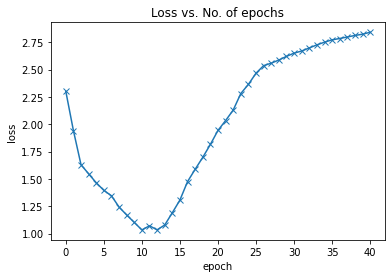

In [ ]:
plot_losses(history)

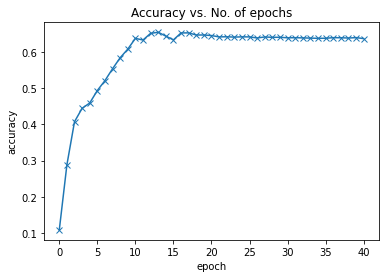

In [ ]:
plot_accuracies(history)

In [ ]:
model_temp_3.evaluate(train_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.9986239075660706, 'loss': 0.014493538998067379}

In [ ]:
model_temp_3.evaluate(val_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.6314280033111572, 'loss': 2.8187122344970703}

# CNN + Pool


In [ ]:
# Extend Image Classification base to model definition
model_temp_4 = Sequential()

# Input Layer
model_temp_4.add(layers.Input(shape=val_ds[0][0][0].shape))

# Hidden Layer
model_temp_4.add(layers.Conv2D(32, (3, 3)))
model_temp_4.add(PReLU())
model_temp_4.add(layers.Conv2D(64, (3, 3)))
model_temp_4.add(PReLU())
model_temp_4.add(layers.Conv2D(128, (3, 3)))
model_temp_4.add(PReLU())
model_temp_4.add(layers.Conv2D(128, (3, 3)))
model_temp_4.add(PReLU())

# Output Layer
model_temp_4.add(layers.MaxPool2D())
model_temp_4.add(layers.Flatten())
model_temp_4.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model_temp_4.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
             PReLU-2           [-1, 32, 30, 30]               1
            Conv2d-3           [-1, 64, 14, 14]          18,496
             PReLU-4           [-1, 64, 14, 14]               1
            Conv2d-5          [-1, 128, 12, 12]          73,856
             PReLU-6          [-1, 128, 12, 12]               1
            Conv2d-7            [-1, 128, 5, 5]         147,584
             PReLU-8            [-1, 128, 5, 5]               1
           Flatten-9                 [-1, 3200]               0
           Linear-10                   [-1, 10]          32,010
Total params: 272,846
Trainable params: 272,846
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.99
Params size (MB): 1.04
Estimated T

In [ ]:
history = {"loss" : [] , "accuracy" : []}
res = [ImageClassificationBase()]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'accuracy': 0.10097656399011612, 'loss': 2.302630662918091}]

In [ ]:
for epochs, lr in train_var:
    print(f"Training for {epochs} epochs, with a learning rate of {lr}...")
    model_temp_4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    model_temp_4_fit = model_temp_4.fit(x=train_ds, epochs=epochs, validation_data=train_ds)
    history["loss"] += model_temp_4_fit.history["val_loss"]
    history["accuracy"] += model_temp_4_fit.history["val_accuracy"] 

Training for 5 epochs, with a learning rate of 0.01...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 1.9200, val_accuracy: 0.3098
Epoch [1], val_loss: 1.6804, val_accuracy: 0.3992
Epoch [2], val_loss: 1.5252, val_accuracy: 0.4451
Epoch [3], val_loss: 1.4325, val_accuracy: 0.4881
Epoch [4], val_loss: 1.2999, val_accuracy: 0.5334
Training for 10 epochs, with a learning rate of 0.001...
Epoch [0], val_loss: 1.1341, val_accuracy: 0.6008
Epoch [1], val_loss: 1.0962, val_accuracy: 0.6066
Epoch [2], val_loss: 1.0486, val_accuracy: 0.6355
Epoch [3], val_loss: 1.0444, val_accuracy: 0.6287
Epoch [4], val_loss: 1.0111, val_accuracy: 0.6510
Epoch [5], val_loss: 1.0019, val_accuracy: 0.6641
Epoch [6], val_loss: 1.0090, val_accuracy: 0.6689
Epoch [7], val_loss: 1.0610, val_accuracy: 0.6687
Epoch [8], val_loss: 1.1336, val_accuracy: 0.6547
Epoch [9], val_loss: 1.2090, val_accuracy: 0.6562
Training for 10 epochs, with a learning rate of 0.0001...
Epoch [0], val_loss: 1.2474, val_accuracy: 0.6662
Epoch [1], val_loss: 1.3151, val_accuracy: 0.6639
Epoch [2], val_loss: 1.3559, val_ac

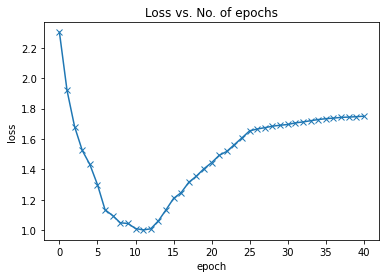

In [ ]:
plot_losses(history)

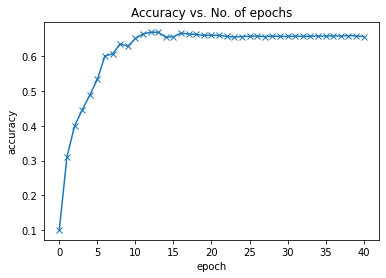

In [ ]:
plot_accuracies(history)

In [ ]:
model_temp_4.evaluate(train_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.9869422316551208, 'loss': 0.0731666311621666}

In [ ]:
model_temp_4.evaluate(val_ds)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'accuracy': 0.6572389006614685, 'loss': 1.7671829462051392}